In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
data

StationId         Datetime  PM2.5    PM10     NO     NO2    NOx    NH3  \
0        TG002   5/14/2018 0:00  35.25   88.50   2.12   33.10  19.30  14.10   
1        TG002   5/14/2018 1:00  32.00   73.50   2.17   20.30  12.60  13.80   
2        TG002   5/14/2018 2:00  20.50   58.00   3.00   17.35  11.65  13.48   
3        TG002   5/14/2018 3:00  21.00   50.00   2.73   18.28  11.93  13.50   
4        TG002   5/14/2018 4:00  18.50   43.50   2.20   16.38  10.45  15.13   
...        ...              ...    ...     ...    ...     ...    ...    ...   
5086     TG002  1/31/2019 19:00  40.75   93.75   3.55   91.53  51.58  17.98   
5087     TG002  1/31/2019 20:00  64.25  151.75   4.97  121.20  68.53  21.15   
5088     TG002  1/31/2019 21:00  82.25  179.50  17.82  142.17  90.10  20.10   
5089     TG002  1/31/2019 22:00  78.25  165.00  22.60  144.02  94.95  20.75   
5090     TG002  1/31/2019 23:00  75.50  160.75  12.47  134.22  81.55  21.70   

        CO   SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0     0.96  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1     0.17  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2     1.53  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3     2.96  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4     3.49  2.20  70.90     1.20     1.10    1.03  124   Moderate  
...    ...   ...    ...      ...      ...     ...  ...        ...  
5086  0.87  3.45  42.12     3.30     7.35    3.00  106   Moderate  
5087  1.21  3.00  13.75     6.22    16.48    8.20  106   Moderate  
5088  1.48  4.05   2.42     8.55    23.40   12.93  106   Moderate  
5089  1.45  3.97   1.20     9.62    24.93   15.65  107   Moderate  
5090  1.29  2.00   4.97     9.65    22.52   15.62  108   Moderate  

[5091 rows x 16 columns]

In [4]:
df = data.drop(['StationId', 'Datetime', 'PM2.5', 'PM10', 'AQI_Bucket'], axis=1)

In [5]:
df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [6]:
df.columns=['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [7]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
# COvariance matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646  0.8665

In [10]:
# Eigen Vector and eigen values on standarized data x // covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [11]:
# Eigen value and vector on correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [12]:
# eigen value on original x

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [13]:
# SVD

u,s,v = np.linalg.svd(X_std.T)
u

array([[-2.19409922e-01,  3.89778417e-01,  3.85584476e-01,
        -6.25111175e-01, -3.99343330e-01, -1.66818402e-01,
        -8.53138791e-02,  8.67759618e-02, -2.10257008e-02,
         2.40704428e-01],
       [-3.96622389e-01,  1.84027550e-02, -2.32660343e-02,
         1.71146979e-02,  4.54766298e-01, -8.36993228e-02,
         2.48436099e-01, -4.18706975e-01, -1.05291558e-02,
         6.24942354e-01],
       [-4.05762227e-01,  1.41700392e-01,  1.07607082e-01,
        -1.87715293e-01,  2.52522850e-01, -1.19753758e-01,
         1.81722156e-01, -3.25140766e-01, -1.14617198e-02,
        -7.42618419e-01],
       [-2.83960814e-01, -3.79954398e-01,  1.97385887e-01,
         2.30770763e-01,  2.57732754e-02, -7.24261764e-01,
        -1.27665605e-01,  3.47415008e-01, -1.43396196e-01,
        -2.65502669e-03],
       [-3.14791219e-01, -1.29291446e-02,  4.56546556e-01,
         1.62930769e-01,  2.93178664e-01,  5.03592670e-01,
        -5.41614410e-01,  1.79396187e-01, -2.57750261e-02,
         2.

In [14]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.197067527993019
1.4790219555014197
0.8307450519490805
0.7509509109251076
0.5636988437019086
0.4969229973353462
0.37560800277983125
0.2159123202437456
0.0896224116810134
0.0004499778895284624


In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

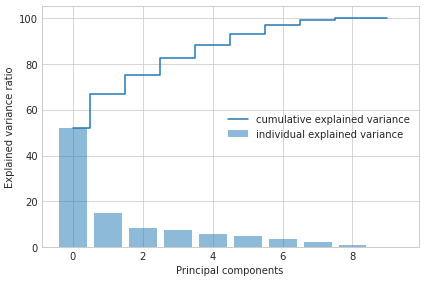

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1),
                      eig_pairs[2][1].reshape(10,1),
                      eig_pairs[3][1].reshape(10,1),
                     eig_pairs[4][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21940992  0.38977842 -0.38558448  0.62511118 -0.39934333]
 [-0.39662239  0.01840276  0.02326603 -0.0171147   0.4547663 ]
 [-0.40576223  0.14170039 -0.10760708  0.18771529  0.25252285]
 [-0.28396081 -0.3799544  -0.19738589 -0.23077076  0.02577328]
 [-0.31479122 -0.01292914 -0.45654656 -0.16293077  0.29317866]
 [-0.20157312 -0.41086692  0.49063533  0.60626503  0.21276804]
 [ 0.00156891 -0.68575153 -0.43134357  0.11142593 -0.30867291]
 [-0.40044602 -0.04296907  0.19488747 -0.1616986  -0.29835782]
 [-0.35198061 -0.03194383  0.35324283 -0.18442185 -0.48519964]
 [-0.35397483  0.20295094  0.04760409 -0.23189137 -0.13543064]]


In [19]:
Y = X_std.dot(matrix_w)
Y

array([[-0.19765723, -0.5380899 , -1.07289608, -0.68771688,  0.09348665],
       [ 1.21126969, -0.93313901, -0.45784207, -0.08462567, -0.61021597],
       [ 0.41448767, -0.84852628, -2.20199809, -0.45703444,  0.58393453],
       ...,
       [-6.73630432,  2.48391753, -1.16867977, -0.112597  ,  1.77404336],
       [-7.47823741,  2.92194657, -1.288714  ,  0.11482206,  1.31512931],
       [-6.45570324,  2.19190377, -0.72960715, -1.02549781,  1.44668294]])

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [22]:
data = pd.DataFrame(Y, columns=['col1', 'col2', 'col3', 'col4', 'col5'])


In [23]:
data

col1      col2      col3      col4      col5
0    -0.197657 -0.538090 -1.072896 -0.687717  0.093487
1     1.211270 -0.933139 -0.457842 -0.084626 -0.610216
2     0.414488 -0.848526 -2.201998 -0.457034  0.583935
3    -0.606004  0.056695 -3.443593 -1.239319  2.224053
4    -1.009638 -0.875476 -4.594629 -1.438518  2.299898
...        ...       ...       ...       ...       ...
5086 -1.835952  0.170261 -0.971045 -0.236498  1.889593
5087 -4.307215  1.096530 -0.695345 -0.958901  2.221895
5088 -6.736304  2.483918 -1.168680 -0.112597  1.774043
5089 -7.478237  2.921947 -1.288714  0.114822  1.315129
5090 -6.455703  2.191904 -0.729607 -1.025498  1.446683

[5091 rows x 5 columns]

In [24]:
X= data.values
y = df['AQI'].values

In [25]:
X.shape

(5091, 5)

In [26]:
y.shape

(5091,)

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4072, 5)
(4072,)
(1019, 5)
(1019,)


In [29]:
X_train

array([[-0.00620929,  0.05929597, -0.43639132, -0.42286213,  0.06507676],
       [ 1.217397  ,  1.24713775,  0.33977864,  0.38186307,  0.36761852],
       [-2.06033843,  0.6760539 ,  2.39135606, -1.19531339, -2.20472756],
       ...,
       [ 0.06393472,  0.53212023,  0.42739707, -0.52724791, -0.14035916],
       [-2.42565013,  0.38135143, -0.25552344, -1.18052372,  0.35488229],
       [ 2.39906398, -0.16249411, -0.66480149,  0.39270996, -0.47451684]])

In [30]:
X_test

array([[ 1.24049847, -0.25122645, -0.17507232,  0.26075322, -0.2401552 ],
       [-0.86177543,  0.76340199,  0.82332326, -1.21562748, -1.19842227],
       [ 1.58633493,  0.76863872, -0.04393395, -0.29011813,  0.10438366],
       ...,
       [-1.29948588,  0.10108666, -0.61333614, -1.18510269,  0.29019263],
       [-0.34858389,  0.60811756,  0.32067997, -0.44680632,  0.08761367],
       [ 0.77750076,  0.8929486 ,  1.06452193, -0.40458063, -1.11949186]])

In [31]:
y_train

array([ 92,  33,  81, ...,  92, 127, 162], dtype=int64)

In [32]:
y_test

array([59, 65, 45, ..., 94, 60, 36], dtype=int64)

In [33]:
sc=StandardScaler()

scaler = sc.fit(X_train)

trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [34]:
trainX_scaled

array([[ 1.37509266e-03,  3.86837639e-02, -4.91183748e-01,
        -4.90574410e-01,  8.09032609e-02],
       [ 5.38064730e-01,  1.01159318e+00,  3.69547174e-01,
         4.47050852e-01,  4.77821900e-01],
       [-8.99592671e-01,  5.43843296e-01,  2.64463668e+00,
        -1.39059569e+00, -2.89695883e+00],
       ...,
       [ 3.21411673e-02,  4.25953503e-01,  4.66711320e-01,
        -6.12199460e-01, -1.88617701e-01],
       [-1.05982314e+00,  3.02465352e-01, -2.90610964e-01,
        -1.37336352e+00,  4.61112646e-01],
       [ 1.05635924e+00, -1.42974819e-01, -7.44478399e-01,
         4.59689097e-01, -6.27014742e-01]])

In [35]:
testX_scaled

array([[ 0.54819734, -0.21565161, -0.20139498,  0.30593976, -0.31954478],
       [-0.37388735,  0.61538631,  0.90577226, -1.41426465, -1.57674002],
       [ 0.69988571,  0.61967549, -0.05596954, -0.33590778,  0.13247181],
       ...,
       [-0.56587285,  0.0729127 , -0.68740608, -1.3786987 ,  0.37624325],
       [-0.14879486,  0.4881996 ,  0.34836777, -0.51847297,  0.11047048],
       [ 0.34512051,  0.72149229,  1.17324867, -0.46927372, -1.47318753]])

In [38]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=6, input_dim=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=128, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(trainX_scaled, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
204/204 [==============================] - 0s 603us/step - loss: 8536.2764
Epoch 2/100
204/204 [==============================] - 0s 551us/step - loss: 3160.7737
Epoch 3/100
204/204 [==============================] - 0s 523us/step - loss: 1462.4612
Epoch 4/100
204/204 [==============================] - 0s 504us/step - loss: 877.6848
Epoch 5/100
204/204 [==============================] - 0s 551us/step - loss: 653.9116
Epoch 6/100
204/204 [==============================] - 0s 525us/step - loss: 551.4148
Epoch 7/100
204/204 [==============================] - 0s 528us/step - loss: 490.6186
Epoch 8/100
204/204 [==============================] - 0s 487us/step - loss: 448.8941
Epoch 9/100
204/204 [==============================] - 0s 507us/step - loss: 422.4988
Epoch 10/100
204/204 [==============================] - 0s 530us/step - loss: 407.4766
Epoch 11/100
204/204 [==============================] - 0s 543us/step - loss: 399.5517
Epoch 12/100
204/204 [===========================

204/204 [==============================] - 0s 580us/step - loss: 363.5096
Epoch 96/100
204/204 [==============================] - 0s 482us/step - loss: 363.2666
Epoch 97/100
204/204 [==============================] - 0s 480us/step - loss: 363.9172
Epoch 98/100
204/204 [==============================] - 0s 480us/step - loss: 362.9071
Epoch 99/100
204/204 [==============================] - 0s 481us/step - loss: 363.3775
Epoch 100/100
204/204 [==============================] - 0s 514us/step - loss: 363.3192


In [39]:
model.evaluate(testX_scaled, y_test)

32/32 [==============================] - 0s 484us/step - loss: 379.3492


379.3492431640625

In [40]:
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [41]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   83.976318
1         65   84.694977
2         45   61.125210
3        142  120.779137
4        126  108.605125
...      ...         ...
1014     139  126.787804
1015      45   44.808418
1016      94  124.754608
1017      60   83.886787
1018      36   55.557777

[1019 rows x 2 columns]

In [42]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.59889435511434


Actual   Predicted        APE
0      59   83.976318  42.332743
1      65   84.694977  30.299964
2      45   61.125210  35.833800
3     142  120.779137  14.944270
4     126  108.605125  13.805456

In [43]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.693517027940086
Mean Squared Error: 379.34918041213956
Root Mean Squared Error: 19.476888365756466
Mean Absolute Percentage Error: 0.2040110564488564
r2 score : 0.764611336068576


In [44]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[10, 20, 30, 40, 50]
    epoch_list  =   [10, 50, 100, 200, 2000]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)

    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 10 - epochs: 10 Accuracy: 34.69010727367356
2 Parameters: batch_size: 10 - epochs: 50 Accuracy: 33.87690846493456
3 Parameters: batch_size: 10 - epochs: 100 Accuracy: 32.85822250938244
4 Parameters: batch_size: 10 - epochs: 200 Accuracy: 32.45440177882645
5 Parameters: batch_size: 10 - epochs: 2000 Accuracy: 32.150867172835675
6 Parameters: batch_size: 20 - epochs: 10 Accuracy: 32.83382151984068
7 Parameters: batch_size: 20 - epochs: 50 Accuracy: 32.31206931765388
8 Parameters: batch_size: 20 - epochs: 100 Accuracy: 32.44870140469557
9 Parameters: batch_size: 20 - epochs: 200 Accuracy: 33.03180792294377
10 Parameters: batch_size: 20 - epochs: 2000 Accuracy: 31.340145409808187
11 Parameters: batch_size: 30 - epochs: 10 Accuracy: 32.593575206415935
12 Parameters: batch_size: 30 - epochs: 50 Accuracy: 32.782428091893735
13 Parameters: batch_size: 30 - epochs: 100 Accuracy: 32.09251402565343
14 Parameters: batch_size: 30 - epochs: 200 Accuracy: 31.30571249745094
1

<AxesSubplot:xlabel='Parameters'>

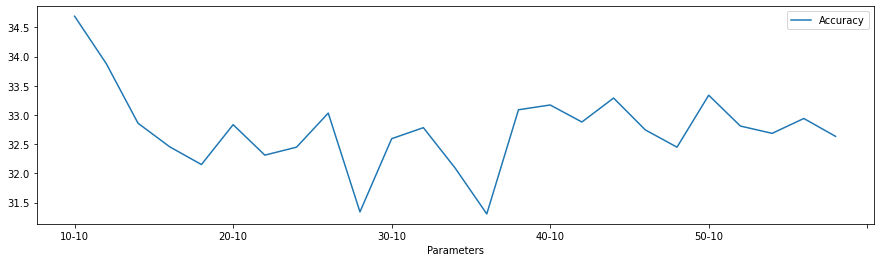

In [45]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [56]:
# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train ,batch_size = 10, epochs = 10, validation_data=(testX_scaled, y_test), verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [57]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   82.134949
1         65   85.287048
2         45   60.382011
3        142  120.901115
4        126  106.394814
...      ...         ...
1014     139  124.334114
1015      45   43.961845
1016      94  127.271034
1017      60   83.174858
1018      36   55.658268

[1019 rows x 2 columns]

In [58]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 80.15195308189774


Actual   Predicted        APE
0      59   82.134949  39.211778
1      65   85.287048  31.210844
2      45   60.382011  34.182248
3     142  120.901115  14.858369
4     126  106.394814  15.559672

In [59]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.634226360077713
Mean Squared Error: 375.70211981338656
Root Mean Squared Error: 19.383036908941452
Mean Absolute Percentage Error: 0.1984804691810225
r2 score : 0.7668743611809137


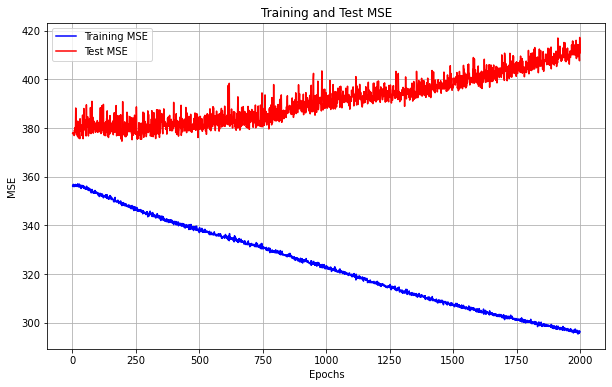

In [60]:
history = model.fit(trainX_scaled, y_train ,batch_size = 30, epochs = 2000, validation_data=(testX_scaled, y_test), verbose=0)

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

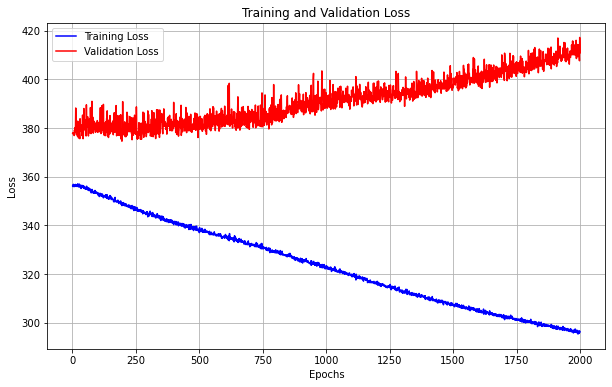

In [61]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()